In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('wines_SPA.csv', header='infer')
df.head()

winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0

<Axes: >

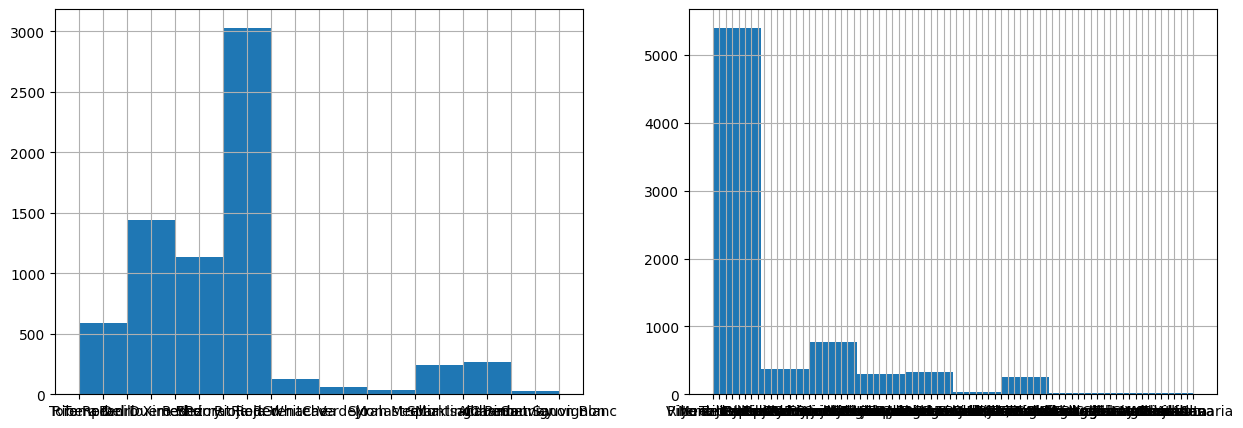

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(121)
df['type'].hist()
plt.subplot(122)
df['region'].hist()

In [3]:
df["year"] = df["year"].replace("N.V.",np.NaN)
df = df.dropna()
df['year'] = df['year'].astype(np.int64)
print(df['year'].unique())

[2013 2018 2009 1999 1996 1998 2010 1995 2015 2011 2016 1970 1946 1962
 2019 2004 1931 1979 2005 2020 2014 1985 1929 2007 2012 2017 2008 2006
 2000 2003 2002 1991 1994 1990 1989 1987 1986 1981 2001 1968 1964 1982
 1974 1983 1955 1980 1972 1953 1958 1942 1965 1992 1973 1997 1967 1975
 1910 1961 1954 1988 1969 1951 1928 1976 1949 2021 1959 1922 1978 1925]


In [4]:
from sklearn.preprocessing import LabelEncoder

print("categorical Variables:")
for col in df.columns:
    if df[col].dtype == "object":
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str))
X = df.drop("region",axis=1)
y = df[["region"]]
y_uni = y["region"].unique().ravel()
y = y.values.ravel()
df.head()

categorical Variables:
winery
wine
country
region
type


winery  wine  year  rating  num_reviews  country  region   price  type  \
0     344   607  2013     4.9           58        0      58  995.00    19   
1      28   653  2018     4.9           31        0      61  313.50    18   
2     366   622  2009     4.8         1793        0      46  324.95    11   
3     366   622  1999     4.8         1705        0      46  692.96    11   
4     366   622  1996     4.8         1309        0      46  778.06    11   

   body  acidity  
0   5.0      3.0  
1   4.0      2.0  
2   5.0      3.0  
3   5.0      3.0  
4   5.0      3.0

In [5]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 
print(X.__len__())
ros = RandomOverSampler(sampling_strategy='minority')
X, y = ros.fit_resample(X, y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the DataFrame
X_standardized = scaler.fit_transform(X)

# Convert the result back to a DataFrame (optional)
X_std = pd.DataFrame(X_standardized, columns = X.columns)
print(X_std.__len__())
X_std.head()

6070
8290


winery      wine      year    rating  num_reviews  country     price  \
0  1.550241  1.529086 -0.162993  5.798882    -0.499343      0.0  6.577711   
1 -1.993784  1.826571  0.621865  5.798882    -0.548622      0.0  1.789229   
2  1.796977  1.626092 -0.790879  4.877260     2.667272      0.0  1.869681   
3  1.796977  1.626092 -2.360595  4.877260     2.506660      0.0  4.455461   
4  1.796977  1.626092 -2.831510  4.877260     1.783905      0.0  5.053407   

       type      body   acidity  
0  2.640118  1.714353  0.185153  
1  2.321123 -0.233562 -4.596533  
2  0.088157  1.714353  0.185153  
3  0.088157  1.714353  0.185153  
4  0.088157  1.714353  0.185153

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.6, random_state=42)
print(y_train.__len__())

3316


In [9]:
y_train = np.array(y_train[:-len(y_uni)])
y_uni = np.array(y_uni)
y_train = np.concatenate((y_train, y_uni))
print(y_train.__len__())

3316


In [10]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Initialize and train regression models
models = [
    ("SVC", SVC()),
    ("XGBClassifier", XGBClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
]

# Initialize a list to store results
results = []

# Fit and evaluate each model
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    ACC = accuracy_score(y_test, y_pred)
    
    results.append([name, ACC])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=["Model", "ACC"])

# Find the model with the lowest MSE and highest R-squared
best_r2_model = results_df.loc[results_df["ACC"].idxmax()]

print("\nModel Evaluation Results:")
print(results_df)
print("\nBest model based on ACC:")
print(best_r2_model)

SVC
XGBClassifier
KNeighborsClassifier
RandomForestClassifier

Model Evaluation Results:
                    Model       ACC
0                     SVC  0.952352
1           XGBClassifier  0.970647
2    KNeighborsClassifier  0.943506
3  RandomForestClassifier  0.970647

Best model based on ACC:
Model    XGBClassifier
ACC           0.970647
Name: 1, dtype: object
